##  Simple Transport between graphs using FGW

In [1]:
import numpy as np
import os,sys
sys.path.append(os.path.realpath('../lib'))
from graph import graph_colors,draw_rel,draw_transp,Graph,wl_labeling
from ot_distances import Fused_Gromov_Wasserstein_distance,Wasserstein_distance
import copy
from data_loader import load_local_data,histog,build_noisy_circular_graph
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
g1=Graph()
g1.add_attibutes({0:1,1:7,2:1,3:7})
g1.add_edge((0,1))
g1.add_edge((1,2))
g1.add_edge((3,0))
g1.add_edge((3,2))
g1.add_edge((0,2))
g2=Graph()
g2.add_attibutes({0:7,1:1,2:7,3:1})
g2.add_edge((0,1))
g2.add_edge((1,2))
g2.add_edge((3,0))
g2.add_edge((3,2))
g2.add_edge((2,0))

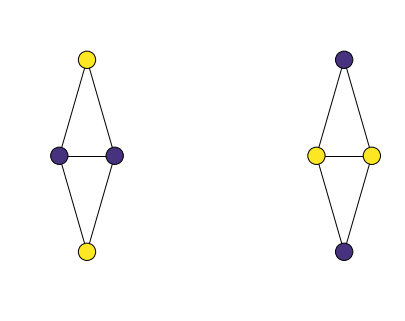

In [3]:
plt.figure(figsize=(5,4))
vmin=0
vmax=7
draw_rel(g1.nx_graph,draw=False,vmin=vmin,vmax=vmax,with_labels=False)
draw_rel(g2.nx_graph,draw=False,vmin=vmin,vmax=vmax,with_labels=False,shiftx=5,swipy=True)
plt.show()

In [4]:
alpha=0.5
dfgw=Fused_Gromov_Wasserstein_distance(alpha=alpha,features_metric='dirac',method='shortest_path').graph_d(g1,g2)
dw=Wasserstein_distance(features_metric='dirac').graph_d(g1,g2)
dgw=Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(g1,g2)
print('Wasserstein distance={}, Gromov distance={} \nFused Gromov-Wasserstein distance for alpha {} = {}'.format(dw,dgw,alpha,dfgw))

Wasserstein distance=0.0, Gromov distance=1.3749500968472382e-12 
Fused Gromov-Wasserstein distance for alpha 0.5 = 0.125


In [5]:
def build_comunity_graph(N=30,mu=0,sigma=0.3,pw=0.8):
    v=mu+sigma*np.random.randn(N);
    g=Graph()
    g.add_nodes(list(range(N)))
    for i in range(N):
         g.add_one_attribute(i,v[i])
         for j in range(N):
             r=np.random.rand()
             if  r<pw:
                 g.add_edge((i,j))
    return g


In [6]:
N=5
mu1=-1.5
mu2=1.5
vmin=-3
vmax=2
np.random.seed(12)
g1=build_comunity_graph(N=N,mu=mu1,sigma=0.8,pw=0.5)
g2=build_comunity_graph(N=N,mu=mu2,sigma=0.8,pw=0.5)

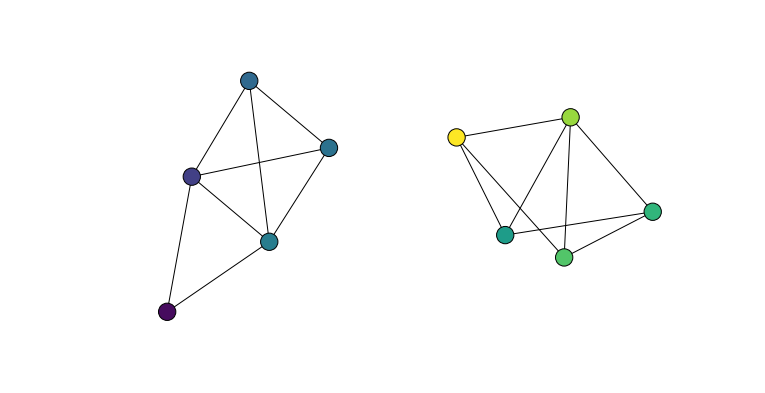

In [7]:
plt.figure(figsize=(10,5))
draw_rel(g1.nx_graph,vmin=vmin,vmax=vmax,with_labels=False,draw=False)
draw_rel(g2.nx_graph,vmin=vmin,vmax=vmax,with_labels=False,shiftx=3,draw=False)
plt.show()

In [8]:
g2.all_matrix_attr()

array([ 0.27222293,  1.22374052,  2.46173068, -0.26447481,  0.63538806])

In [9]:
g1.all_matrix_attr()

array([-1.12161133, -2.0451407 , -1.3060484 , -2.86058851, -0.89748573])

In [10]:
def merge_graph(g1,g2):
    gprime=nx.Graph(g1)
    N0=len(gprime.nodes())
    g2relabel=nx.relabel_nodes(g2, lambda x: x +N0)
    gprime.add_nodes_from(g2relabel.nodes(data=True))
    gprime.add_edges_from(g2relabel.edges(data=True)) 
    gprime.add_edge(N0-1,N0)
    
    return gprime

In [11]:
g3=merge_graph(merge_graph(g1.nx_graph,merge_graph(g1.nx_graph,g2.nx_graph)),g2.nx_graph)

In [12]:
g4=merge_graph(merge_graph(g2.nx_graph,merge_graph(g1.nx_graph,g2.nx_graph)),g1.nx_graph)

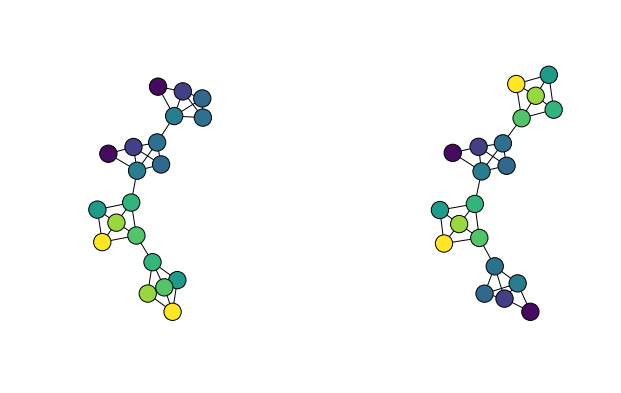

In [13]:
plt.figure(figsize=(8,5))
draw_rel(g3,vmin=vmin,vmax=vmax,with_labels=False,draw=False)
draw_rel(g4,vmin=vmin,vmax=vmax,with_labels=False,shiftx=3,draw=False)
plt.show()

In [14]:
G1=Graph(g3)
G2=Graph(g4)

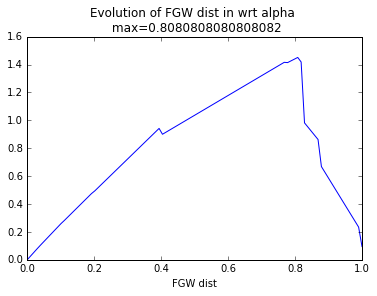

In [15]:
alld=[]
x=np.linspace(0,1,100)
for alpha in x:
    d=Fused_Gromov_Wasserstein_distance(alpha=alpha,features_metric='sqeuclidean').graph_d(G1,G2)
    alld.append(d)
plt.plot(x,alld)
plt.title('Evolution of FGW dist in wrt alpha \n max={}'.format(x[np.argmax(alld)]))
plt.xlabel('Alpha')
plt.xlabel('FGW dist')
plt.show()

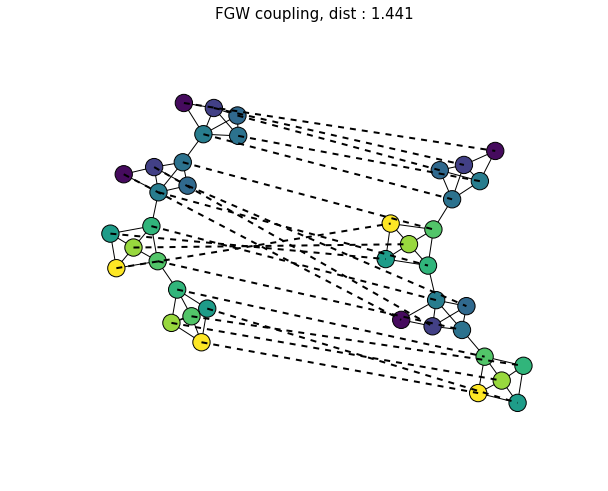

In [16]:
fig=plt.figure(figsize=(10,8))
thresh=0.004
gwdist=Fused_Gromov_Wasserstein_distance(alpha=0.8,features_metric='sqeuclidean')
d=gwdist.graph_d(G1,G2)
plt.title('FGW coupling, dist : '+str(np.round(d,3)),fontsize=15)
draw_transp(G1,G2,gwdist.transp,shiftx=2,shifty=0.5,thresh=thresh,
            swipy=True,swipx=False,with_labels=False,vmin=vmin,vmax=vmax)

plt.show()

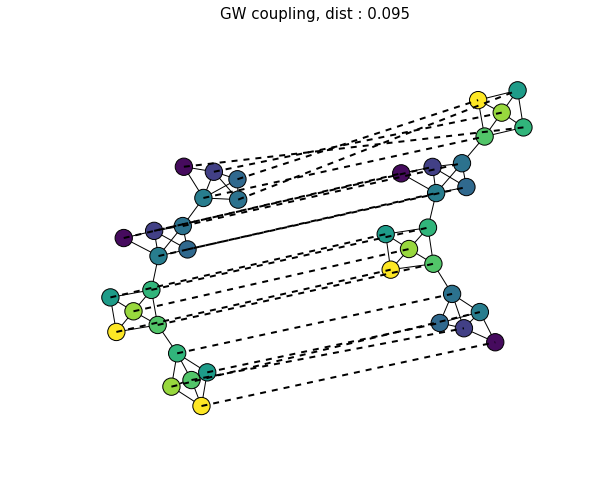

In [17]:
fig=plt.figure(figsize=(10,8))
thresh=0.004
gwdist=Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='sqeuclidean')
d=gwdist.graph_d(G1,G2)
plt.title('GW coupling, dist : '+str(np.round(d,3)),fontsize=15)
draw_transp(G1,G2,gwdist.transp,shiftx=2,shifty=0.5,thresh=thresh,
            swipy=False,swipx=False,with_labels=False,vmin=vmin,vmax=vmax)

plt.show()